# Data Analysis 

## Set-Up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Data Generator

In [4]:
np.random.seed(seed=0)
import src.data_generator as dt
n = 1000
w0 = 10
w1 = 4
x_min = -2
x_max = 2
std = 1
w = np.array([[w0, w1]]).T
data = dt.DataGenerator(n,w, x_min, x_max, std=std)
X, y = data.get_data()

## Plot Scatter 

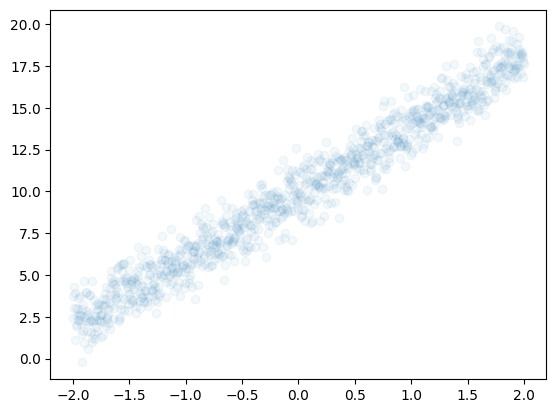

In [5]:
fig, ax = plt.subplots(1,1)
ax.scatter(X, y, alpha=.05)
plt.show()

In [6]:
from src.algorithms import PLA
from src.models import LinearModel
from src.optimizers import SteepestDescentMethod, NewtonsMethod
from src.analyzers import PlotterAlgorithmObserver
from src.stop_criteria import CompositeStopCriteria, MaxIterationStopCriteria, MinErrorStopCriteria

In [7]:
def plot_strategy(optimizer, learning_rate):
    model = LinearModel()
    alg = PLA(optimizer, model)
    min_error = 1
    max_iteration = 100

    np.random.seed(seed=0)
    stop_criteria = CompositeStopCriteria()
    stop_criteria.add(MinErrorStopCriteria(min_error=min_error))
    stop_criteria.add(MaxIterationStopCriteria(max_iteration=max_iteration))

    analyzer = PlotterAlgorithmObserver()
    alg.add(analyzer)

    alg.fit(X, y, stop_criteria)

    final_iteration = max(analyzer.iterations)
    print(f"Final Iteration: {final_iteration}")
    print(f"Final Error: {analyzer.errors[final_iteration]}")
    print(f"Final Weights: {analyzer.weights[final_iteration]}")
    analyzer.plot(weights=w)

Final Iteration: 18
Final Error: 0.9962146892158049
Final Weights: [[9.80719292]
 [3.98199542]]


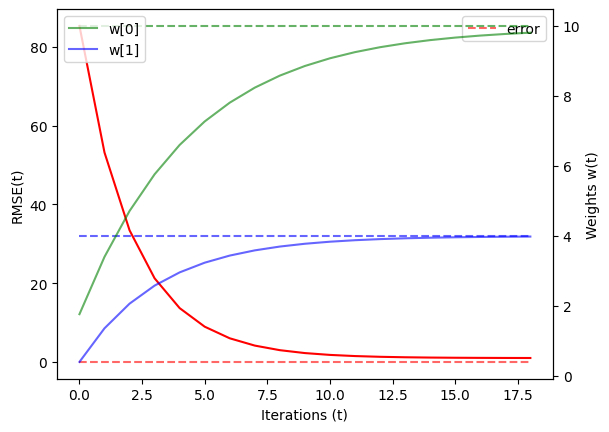

In [14]:
learning_rate = .1
optimizer = SteepestDescentMethod(learning_rate)
plot_strategy(optimizer, learning_rate)

Final Iteration: 6
Final Error: 0.9948001668644637
Final Weights: [[9.82676375]
 [3.93916979]]


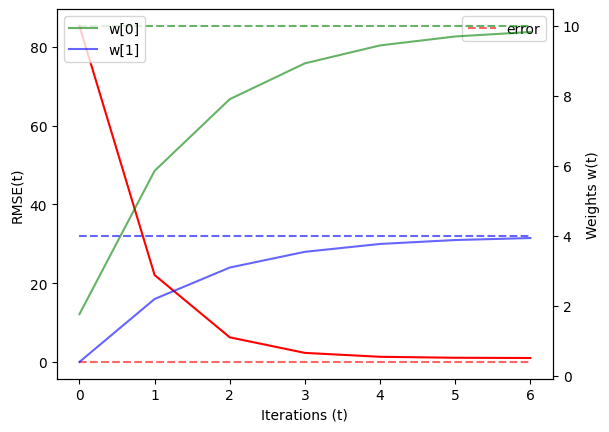

In [15]:
learning_rate = .5
optimizer = NewtonsMethod(learning_rate)
plot_strategy(optimizer, learning_rate)